In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Kiểm tra các thông tin cơ bản.

In [ ]:
#xem thông tin chung về dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# - kiểm tra chất lượng dữ liệu: thiếu, trùng lắp

In [ ]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Kiểm tra giá trị thiếu và trùng lặp
missing_values = data.isnull().sum()
duplicated_rows = data.duplicated().sum()


In [ ]:
# Kiểm tra giá trị thiếu
if missing_values.sum() == 0:
    print("Không có giá trị thiếu trong dữ liệu.")
else:
    print("Các cột có giá trị thiếu:")
    print(missing_values[missing_values > 0])

Không có giá trị thiếu trong dữ liệu.


In [ ]:
# Kiểm tra giá trị trùng lặp
if data.duplicated().sum() == 0:
    print("Không có dòng dữ liệu trùng lặp.")
else:
    print(f"Có {duplicated_rows} dòng trùng lặp trong dữ liệu.")

Có 1 dòng trùng lặp trong dữ liệu.


In [ ]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(inplace = True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# - thống kê mô tả:

In [ ]:

description = data.describe(include='all')
description

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [ ]:
#Phân loại các cột
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Thống kê cho categorical features
print("Categorical Features:")
print("=================================")
for feature in categorical_features:
    print(f"{feature}:\n{data[feature].value_counts()}\n")

Categorical Features:
sex:
sex
male      675
female    662
Name: count, dtype: int64

smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



In [ ]:
# Thống kê cho numerical features
print("Numerical Features:")
# Thống kê mô tả chung cho dữ liệu số
print(data[numerical_features].describe())

Numerical Features:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


# 3. EDA

# - xem xét phân phối Target

Text(0.5, 1.0, 'Distribution of Charges')

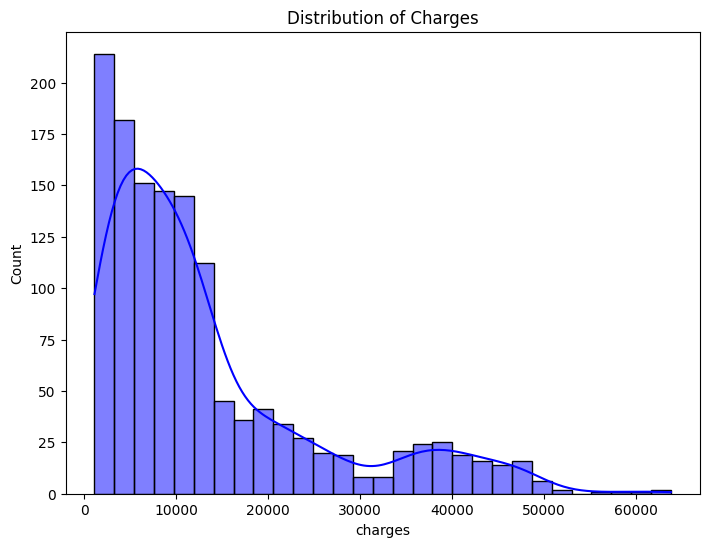

In [ ]:
# Thiết lập kích thước hình ảnh
plt.figure(figsize=(18, 6))

# Phân phối của biến mục tiêu (charges)
plt.subplot(1, 2, 1)
sns.histplot(data['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')

- Phân phối lệch phải, với một số giá trị cao bất thường.
- Phần lớn các chi phí bảo hiểm tập trung trong khoảng dưới 20,000.

# - xem xét mối quan hệ giữa các features -> target

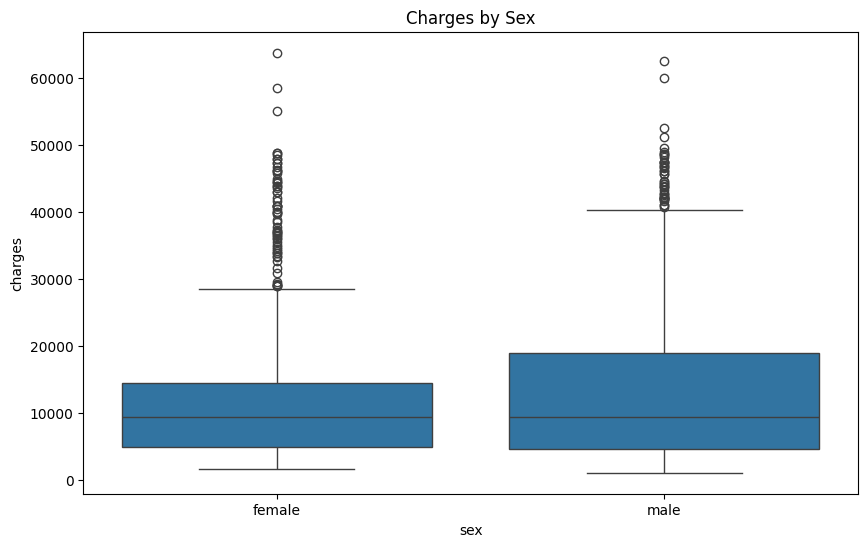

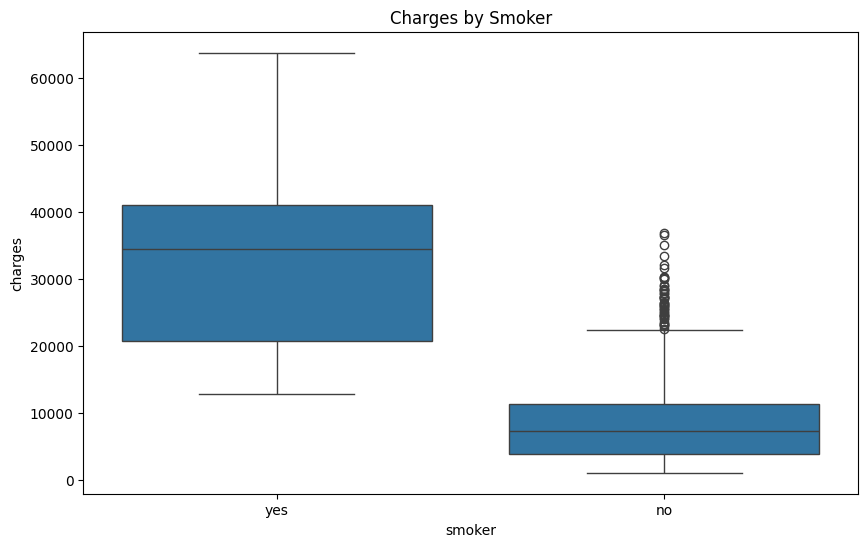

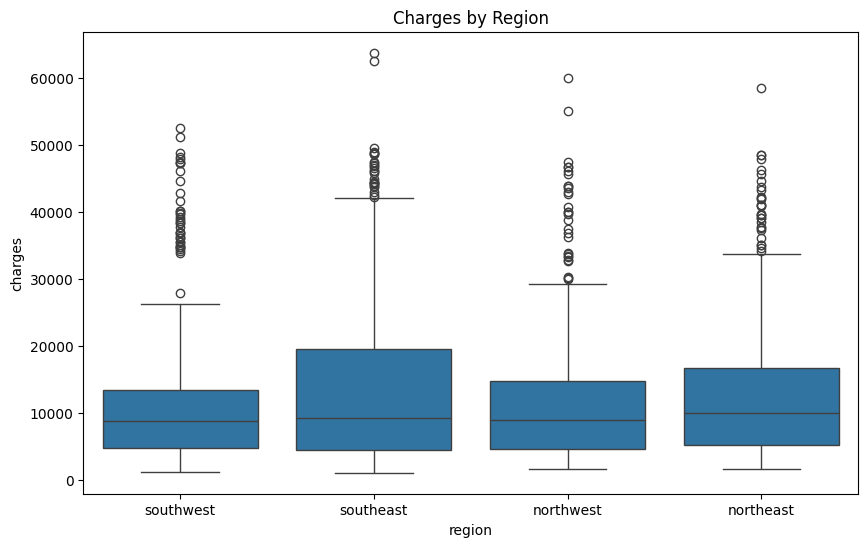

In [ ]:
# 1. Mối quan hệ giữa categorical features -> target
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], y=data['charges'])
    plt.title(f'Charges by {feature.capitalize()}')
    plt.show()


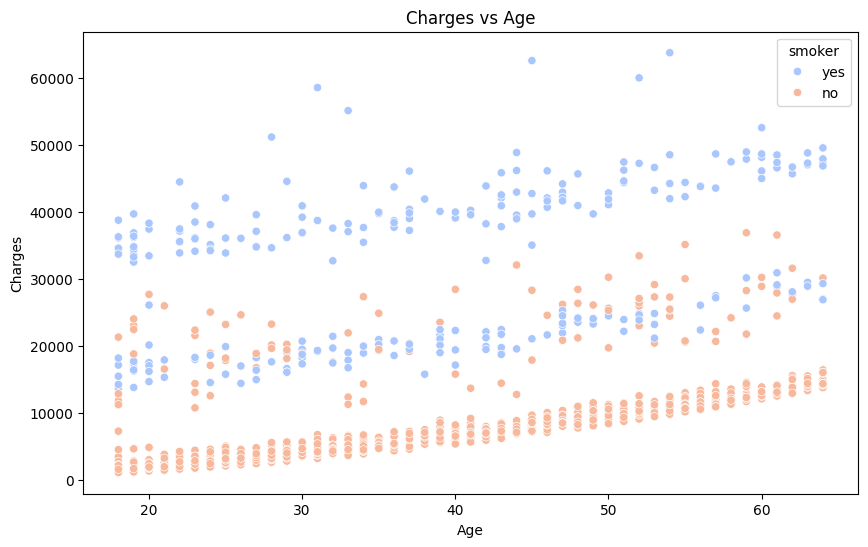

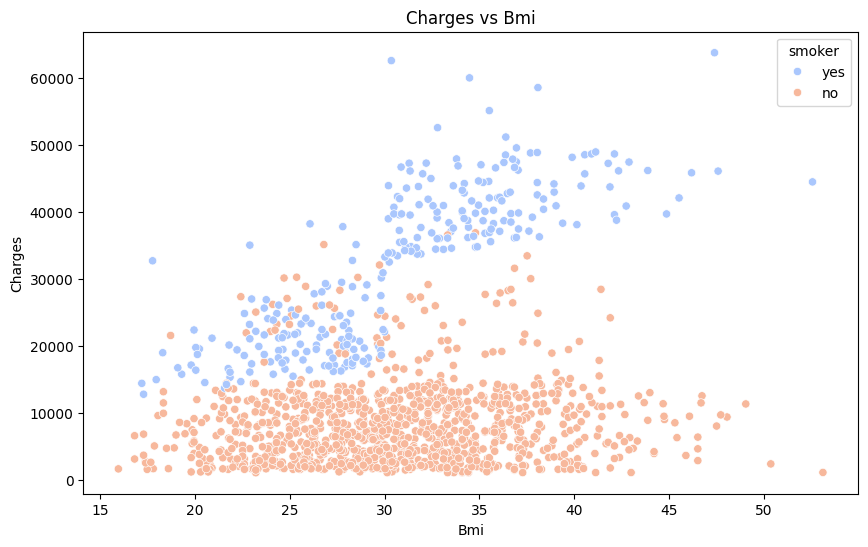

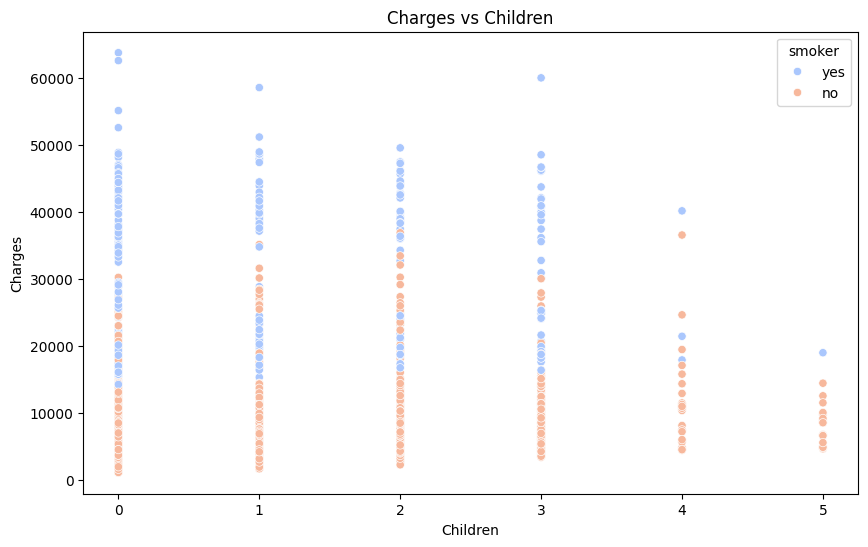

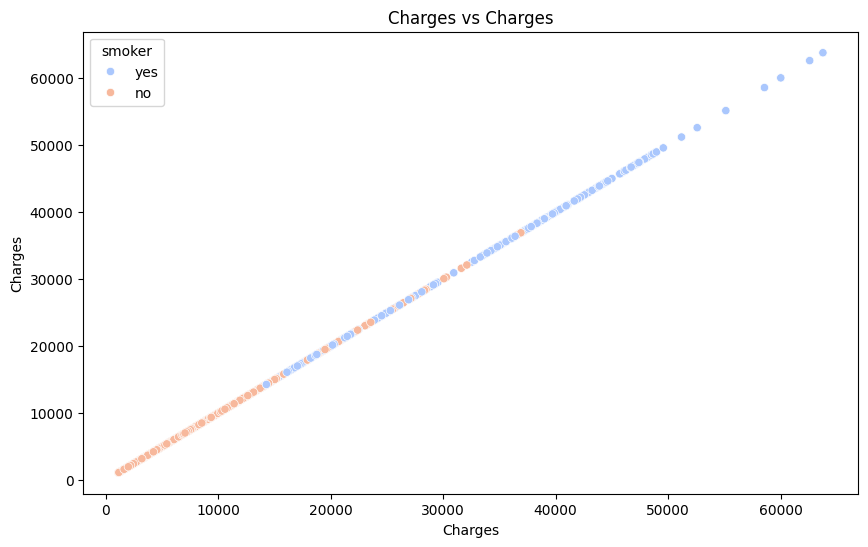

In [ ]:
# 2. Mối quan hệ giữa numerical features -> target
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['charges'], hue=data['smoker'], palette='coolwarm')
    plt.title(f'Charges vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()

# - Tương quan các biến

In [ ]:
# One-hot encoding cột sex, smoker và region
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Hiển thị DataFrame sau khi one-hot encode
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


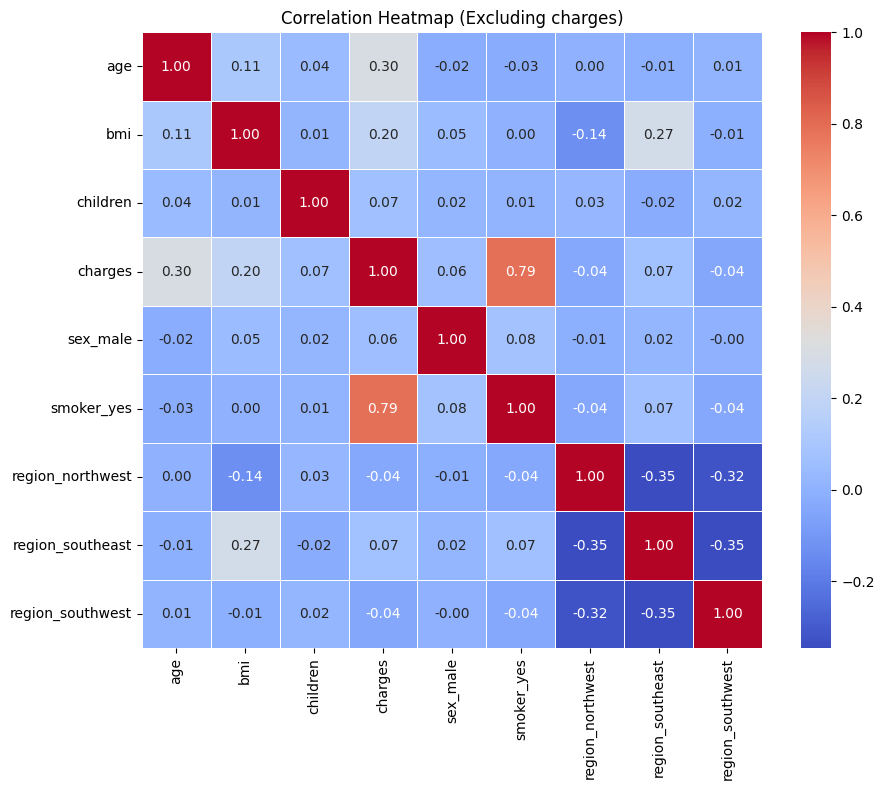


charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64


In [ ]:
# Tính hệ số tương quan giữa các biến trong DataFrame và target
correlation_matrix = data.corr()

# Vẽ heatmap cho hệ số tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding charges)')
plt.show()

# Lấy hệ số tương quan với target
target_correlation = correlation_matrix['charges']

# Sắp xếp và chọn 2 biến có hệ số tương quan cao nhất với target
top_correlations = target_correlation.sort_values(ascending=False)

# In ra các biến có hệ số tương quan cao với target
print()
print(top_correlations.sort_values(ascending=False))

###  **Nhận xét về mức độ quan trọng của các biến trong việc dự đoán chi phí bảo hiểm (`charges`):**

---

### **Top 3 biến có tương quan mạnh nhất với `charges`:**

1. **`smoker_yes` (hút thuốc): 0.787**
   - Đây là biến quan trọng nhất, có tương quan **dương mạnh** với chi phí bảo hiểm.
   - Người hút thuốc có chi phí bảo hiểm cao hơn rất nhiều so với người không hút thuốc.
   - Biến này ảnh hưởng lớn đến mô hình dự đoán và không nên bỏ qua.

2. **`age` (tuổi): 0.298**
   - Tuổi càng cao, chi phí bảo hiểm càng tăng.
   - Điều này hợp lý vì người lớn tuổi có nguy cơ mắc các bệnh lý cao hơn, dẫn đến chi phí y tế cao hơn.

3. **`bmi` (chỉ số khối cơ thể): 0.198**
   - Chỉ số BMI cao có liên quan đến chi phí bảo hiểm cao hơn.
   - Người có BMI cao dễ mắc các bệnh liên quan đến béo phì như tiểu đường, tim mạch, làm tăng chi phí y tế.

---

### **Biến có ảnh hưởng nhỏ hoặc ngược chiều với `charges`:**

4. **`region_southeast`: 0.074**
   - Người sống ở khu vực `southeast` có xu hướng phải trả chi phí bảo hiểm cao hơn một chút so với các khu vực khác.

5. **`children`: 0.067**
   - Số lượng con cái có tác động nhỏ đến chi phí bảo hiểm.
   - Điều này có thể do việc bảo hiểm cho trẻ em không ảnh hưởng nhiều đến chi phí bảo hiểm tổng thể.

6. **`sex_male`: 0.058**
   - Giới tính có tác động rất nhỏ đến chi phí bảo hiểm.

7. **`region_northwest`: -0.039**
8. **`region_southwest`: -0.044**
   - Các khu vực `northwest` và `southwest` có tương quan **ngược chiều nhẹ** với `charges`, cho thấy người sống ở các khu vực này có thể phải trả ít chi phí bảo hiểm hơn.

---

### 📝 **Tóm tắt nhận xét:**

| Biến            | Tương quan với `charges` | Nhận xét                                |
|-----------------|--------------------------|----------------------------------------|
| `smoker_yes`    | 0.787                     | Biến quan trọng nhất, ảnh hưởng rất lớn. |
| `age`           | 0.298                     | Ảnh hưởng trung bình, tuổi càng cao chi phí càng lớn. |
| `bmi`           | 0.198                     | Ảnh hưởng đáng kể, BMI cao làm tăng chi phí. |
| `region_southeast` | 0.074                  | Ảnh hưởng nhỏ, nhưng đáng chú ý ở khu vực này. |
| `children`      | 0.067                     | Ảnh hưởng nhỏ, số con không tác động nhiều. |
| `sex_male`      | 0.058                     | Giới tính có ảnh hưởng không đáng kể. |
| `region_northwest` | -0.039                 | Ảnh hưởng rất nhỏ, theo chiều ngược lại. |
| `region_southwest` | -0.044                 | Ảnh hưởng rất nhỏ, theo chiều ngược lại. |

---

### **Kết luận:**
- **Biến quan trọng nhất:** `smoker_yes`.
- Các biến **`age`** và **`bmi`** cũng có ảnh hưởng đáng kể.
- Các biến liên quan đến khu vực và giới tính có tác động nhỏ, có thể cân nhắc loại bỏ để đơn giản hóa mô hình.

# 4. Modeling

# - Loại outlier


In [ ]:
# Lưu DataFrame ban đầu vào biến Insurance_data
Insurance_data = data.copy()

In [ ]:
# Giả sử bạn đã có DataFrame df chứa các cột: smoker_yes, age, bmi

# Chuyển smoker_yes từ boolean sang numeric (0, 1)
data['smoker_yes'] = data['smoker_yes'].astype(int)

# Chọn các cột cần xử lý
columns = ['smoker_yes', 'age', 'bmi', 'charges']

# Tính toán Q1, Q3, và IQR cho từng cột
for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định outliers theo IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lọc dữ liệu để loại bỏ outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data['smoker_yes'] = data['smoker_yes'].astype(bool)

# Kiểm tra kết quả sau khi loại bỏ outliers
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   
5   31  25.740         0   3756.62160     False       False             False   

   region_southeast  region_southwest  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
5              True             False  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 1 to 1336
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1009 non-null   int64  
 1   bmi               1009 non-null   float64
 2   children          1009 non-null   int64  
 3   charges           1009 non-null   float64
 4   sex_male          1009 non-null   bool   
 5   smoker_yes        1009 non-null   bool   
 6   region_northwest  1009 non-null   bool   
 7   region_southeast  1009 non-null   bool   
 8   region_southwest  1009 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 44.3 KB


In [ ]:
print("chênh lệch số dòng dữ liệu ban đầu là: ")
print(len(Insurance_data) - len(data))

chênh lệch số dòng dữ liệu ban đầu là: 
328


#- Mô hình hồi quy Lasso Regression

In [ ]:
# Chọn các đặc trưng quan trọng
selected_features = ['smoker_yes', 'age','bmi']
X = data[selected_features]
y = data['charges']

In [ ]:
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Chia dữ liệu thành train-test (80:20) với random_state=2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)


In [ ]:
# Khởi tạo mô hình Lasso
m3 = 'Lasso Regression'
lasso = Lasso(alpha=0.01, random_state=2025)

# Huấn luyện mô hình
lasso.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = lasso.predict(X_test)

# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

# Hiển thị kết quả
print(f"MSE {m3}: {mse:,.4f}")
print(f"RMSE {m3}: {rmse:,.4f}")
print(f"MAE {m3}: {mae:,.4f}")
print(f"R² {m3}: {r2:.2f}%")


MSE Lasso Regression: 5,692,227.2674
RMSE Lasso Regression: 2,385.8389
MAE Lasso Regression: 1,251.5229
R² Lasso Regression: 71.03%


###**Nhận xét chi tiết:**

1. **MSE và RMSE:**
   - **MSE** là **5.692 triệu** và **RMSE** là **2,385.84**, cho thấy mô hình dự đoán chi phí bảo hiểm với sai số trung bình khoảng **2,385 đơn vị**.
   - Sai số này vẫn tương đối lớn, nghĩa là mô hình có thể chưa dự đoán tốt với các trường hợp có chi phí bảo hiểm rất cao (outliers).

2. **MAE (Mean Absolute Error):**
   - **MAE** là **1,251.53**, cho thấy sai số tuyệt đối trung bình khoảng **1,251 đơn vị**.
   - MAE nhỏ hơn RMSE, điều này cho thấy các lỗi lớn (outliers) có tác động đáng kể đến MSE và RMSE.

3. **R² (R-squared):**
   - **R² = 71.03%**, cho thấy mô hình giải thích được **71.03%** phương sai của dữ liệu.
   - Đây là một kết quả **tốt**, cho thấy mô hình có khả năng dự đoán khá ổn định.

---

### **Đánh giá:**
- Mô hình **Lasso Regression** hoạt động tốt, với **R² = 71.03%**, cho thấy mô hình có thể giải thích phần lớn biến động của dữ liệu.
- Tuy nhiên, do **MSE** và **RMSE** vẫn còn khá cao, cần tiếp tục tối ưu mô hình hoặc xử lý các outliers để giảm sai số.
- **Lasso Regression** có thể hiệu quả hơn khi dữ liệu chứa nhiều feature có tương quan cao (multicollinearity), giúp giảm overfitting so với Linear Regression thông thường.

